Save for end:

Why RF is better than MODEL (KNN, LR)?


When the data set is large and/or there are many variables it becomes difficult to cluster the data because not all variables can be taken into account, therefore the algorithm can also give a certain chance that a data point belongs in a certain group.

Random forest is kind of universal. It can predict any kind, (categorical or continous) any columns, pixels, zipcodes, revenues.  In general it doesn't overfit and if it does, it is easy to fix.  Don't need a separate validation set.  It has few if any statistical assumptions. It doesn't assume normal distributions, or linear, or that you specify the interactions.  Very few feature engineering. Doesn't need much math manipulation.

Curse of dimensionality - The more columns you have, you create a space that is more and more empty.

What are the pros cons? Why it works good?

Why use RMSLE -> sum((log(actual) - log(predicted))^2)
I believe RMSLE is usually used when you don't want to penalize huge differences in the predicted and true values when both predicted and true values are huge numbers.
https://stats.stackexchange.com/a/110610

We take ten bad models and can make one good model because their errors are not correlated with eachother due to them creating trees off of different chunks of data.

Which variables matter the most and how do they relate to each other and the dependent variable.

For example if you had 3 variables that mattered and 95 that didnt'.  KNN would be find meaningless neighbors because most of your columns are meaningless.

Or if your relationship is y = x1 * x2 then you need to find that interaction.

Find a model that tells you which variables are important and how do they relae to the output.

Difference between "tree space" vs euclidean space.

In bagging, you want each estimator to be as predictive as possible, but the predictions of the individual trees to be as uncorrelated as possible.

Predictive but poorly correlated.

# Random Forest Again

In [14]:
from sklearn.ensemble import RandomForestClassifier

trees = 6
# Default number of trees is 10
rfclf = RandomForestClassifier(n_estimators=trees, n_jobs=-1)
rfclf.fit(tennis_x, tennis_y)

preds = np.stack([t.predict(tennis_x) for t in rfclf.estimators_])

index = 2
print(preds[:,index])
print(np.float64(np.mean(preds[:,index])>.5))
print(tennis_y.iloc[index])


[1. 1. 1. 1. 1. 0.]
1.0
1


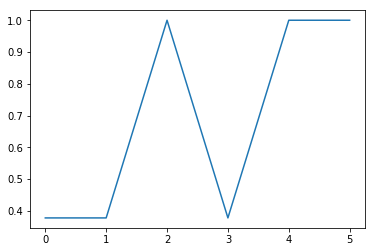

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.plot([metrics.r2_score(tennis_y, np.float64(np.mean(preds[:i+1], axis=0)>.5)) for i in range(trees)]);
plt.show()

# Random Forest

**Random Forest** is a statistical algorithm that is used to cluster points of data in groups.

It is an ensemble approach made up of decision trees.  This can can also be thought of as a form of nearest neighbor predictor.[^1]

**Ensembles** are groups of learners working together to create a strong learner.  The gray ones are a good guess at the data but the red curve is much better.[^2]

[^1]: http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics
[^2]: https://blog.citizennet.com/hs-fs/hubfs/Imported_Blog_Media/skitch.png?t=1529595390188&width=482&name=skitch.png

This is a very popular machine learning algorithm and the go to algorithm for a lot of users because it works pretty good without much work.

### Decision Trees

![titanic](titanic_tree.png)

### How is a decision tree split?

http://www.saedsayad.com/decision_tree.htm

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

### Advantages of Decision Tress
 - Simple to understand, interpret and visualize.
 - Implicitly perform feature selection
 - Handles numerical or categorical data
 - Not much effort needed in setting up data.

### Disadvantages
 - May create overally complex trees that cause overfitting instead of generalizing the data.
 - They can become unstable because of small variations in data which can be fixed with methods known as bagging and boosting.
 - Because decision trees are **greedy** they go for the best answer for the next step, which may cause us to get stuck in a local minimum and not the global minimum that we want.

##### Decision Tree Example
We want to predict whether he will play tennis based on this data
![tennis](tennis.PNG)

Here is our initial tree structure.  When the sky is overcast, he has a 100% chance to play tennis.  This is called a pure subset.  Since the other choices lead to impure subsets, we should split them even further.
![playing](playingBaseball.PNG)

Once we split all the choices down into pure subsets, we can accurately predict what days John will play tennis.
![playing](baseballSplit.PNG)

This leads us to the simplified tree below.
![final](finalTree.PNG)

#### Decision Tree Code Example

In [1]:
import pandas as pd
import numpy as np

# Reading in Tennis Data.
tennis = pd.read_csv("tennis.csv")

print("Tennis data untouched")
print(tennis.head())

# Using Day as index
tennis.set_index('Day', inplace=True)

# Saving copy of mostly untouched data
untouched_data = tennis

# Changing all categorical columns to numbers
for column in tennis.columns.values:
    tennis[column] = tennis[column].astype('category')

tennis = tennis.apply(lambda x: x.cat.codes)

# Splitting data into input data and output data
tennis_x = tennis.drop('Play', axis=1)
tennis_y = tennis['Play']

print("\nTennis Input Data with Categories")
"""
Outlook:          Humidity:        Wind:            Play:
    Sunny = 2         High = 0         Weak = 1         No = 0
    Overcast = 0      Normal = 1       Strong = 0       Yes = 1
    Rain = 1
"""
print(tennis_x.head())
print("\nTennis Output Data with Categories")
print(tennis_y.head())

Tennis data untouched
   Day   Outlook Humidity    Wind Play
0    1     Sunny     High    Weak   No
1    2     Sunny     High  Strong   No
2    3  Overcast     High    Weak  Yes
3    4      Rain     High    Weak  Yes
4    5      Rain   Normal    Weak  Yes

Tennis Input Data with Categories
     Outlook  Humidity  Wind
Day                         
1          2         0     1
2          2         0     0
3          0         0     1
4          1         0     1
5          1         1     1

Tennis Output Data with Categories
Day
1    0
2    0
3    1
4    1
5    1
Name: Play, dtype: int8


In [2]:
# Training our decision tree model
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtmodel = dtclf.fit(tennis_x, tennis_y)

In [15]:
# Visualizing our tree
import graphviz
import os
from sklearn.tree import export_graphviz

export_graphviz(
    dtmodel,
    feature_names=tennis_x.columns,
    filled=True,
    rounded=True,
    out_file="tree.dot"
)

# Run this to print out image
# os.system('dot -Tpng tree.dot -o tree.png')

![tennistree](tennisTree.png)

### Breaking down our tree
![catCodes](catCodes.png)

#### Check when Outlook is Overcast
![overcast](tennistree1.png)

In [9]:
# First part of the tree tells us to split on whether the data is Overcast or not.
untouched_data[untouched_data['Outlook'] == 'Overcast'][['Outlook', 'Play']]
# When it's overcast, they will always play tennis.

# Add overcast False

,Outlook,Play
Day,,
3,Overcast,Yes
7,Overcast,Yes
12,Overcast,Yes
13,Overcast,Yes


#### Humidity Check after Outlook is not Overcast
![humidity](tennistree2.png)

In [11]:
untouched_data[untouched_data['Outlook'] != 'Overcast']

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
5,Rain,Normal,Weak,Yes
6,Rain,Normal,Strong,No
8,Sunny,High,Weak,No
9,Sunny,Normal,Weak,Yes
10,Rain,Normal,Weak,Yes
11,Sunny,Normal,Strong,Yes


In [5]:
untouched_data[
    (untouched_data['Outlook'] != 'Overcast') & (untouched_data['Humidity'] == 'High')
]

,Outlook,Humidity,Wind,Play
Day,,,,
1,Sunny,High,Weak,No
2,Sunny,High,Strong,No
4,Rain,High,Weak,Yes
8,Sunny,High,Weak,No
14,Rain,High,Strong,No


In [6]:
untouched_data[
   (untouched_data['Outlook'] != 'Overcast') & (untouched_data['Humidity'] != 'High')
]

,Outlook,Humidity,Wind,Play
Day,,,,
5,Rain,Normal,Weak,Yes
6,Rain,Normal,Strong,No
9,Sunny,Normal,Weak,Yes
10,Rain,Normal,Weak,Yes
11,Sunny,Normal,Strong,Yes


(.20*4+.80)/5 talk about 3rd level of Tree

### Back to Random Forests

Random Forests are just multiple decision trees used in conjuction.  In a classifcation problem, the multiple decision trees vote on the outcome, while in a regression problem, you will take the average accross all trees.

Its basic principle is that one will be worse at predictions as opposed to a group similar to contestants asking the audience to vote on 'Who wants to be a Millionaire?'

### Advantages
- Handles missing values and maintains accuracy when a large proportion fo the data is missing
- It won't overfit for multiple trees.
- Can handle large data sets with more dimensions.

### Disadvantages
- Good job at classifcation but not great for regression.
- Very 'black box'. You do not know what's going on inside them.

### Applications
- Finding loyal customers at a store/bank, etc.
- Helpful for diagnosing diseases based on past medical history.
- Stock Market: Can be used to figure out expected loss/profit for a particular stock
- Recommendation engine: Finding likelyhood of customer liking a specific product.
- Image Classifcation: Kinect uses it to track the body.

### How are Random Forests Made?
- Assume a total number of cases, N, in a training set.  Then we take a sample of these at random with replacement.
- If there are M input variables/features, a number m<M is specified such that at each node, m variables are selected at random out of the M.  The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
- Each tree is grown as far as possible (overfitting if we were just using 1 decision tree) with no pruning (chopping off nodes)
- Predict new data by voting for classifcation.

Random Forest is an ensemble machine learning algorithm meaning that the algorithm takes a weak algorithm and combines them into a strong one.

They use a divide and conquer approach so a miniforest inside the random forest may detect some other prediction.  For example, if we are trying to figure out if an image is a hand or not, there may be mini forests that can detect fingers.

### Random Forest Terms

**Bagging** (stands for **B**ootstrap **Agg**regat**ing**) is a way to decrease the variance of your prediction by generating additional data for training from your original dataset.  Because you are generating data, you are not improving the predicting power of the model, but decreasing the variance.

**Boosting** is a two-step approach, where one first uses subsets of the original data to produce a series of averagely performing models and then "boosts" their performance by combining them together using a particular cost function (=majority vote). Unlike bagging, in the classical boosting the subset creation is not random and depends upon the performance of the previous models: every new subsets contains the elements that were (likely to be) misclassified by previous models.  Used to reduce bias(underfitting -> Won't be good at predicting) and variance(overfitting -> Too good at predicting the training data but isn't generalizable).